# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [89]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = list(zip(lats, lngs))

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [90]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?lat="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + str(lat_lngs[i][0]) + "&lon=" + str(lat_lngs[i][1]) + "&appid=" + weather_api_key + "&units=imperial"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
City not found. Skipping...
Processing Record 2 of Set 1 | stanovoye
Processing Record 3 of Set 1 | samana
City not found. Skipping...
Processing Record 4 of Set 1 | isafjordur
City not found. Skipping...
Processing Record 5 of Set 1 | holualoa
City not found. Skipping...
Processing Record 6 of Set 1 | bridgewater
Processing Record 7 of Set 1 | klyuchi
City not found. Skipping...
Processing Record 8 of Set 1 | grytviken
City not found. Skipping...
Processing Record 9 of Set 1 | happy valley-goose bay
City not found. Skipping...
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | jamestown
City not found. Skipping...
Processing Record 12 of Set 1 | papatowai
City not found. Skipping...
Processing Record 13 of Set 1 | playa del ingles
City not found. Skipping...
Processing Record 14 of Set 1 | port-aux-francais
City not found. Skipping...
Processing Re

In [92]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          173
Lat           173
Lng           173
Max Temp      173
Humidity      173
Cloudiness    173
Wind Speed    173
Country       173
Date          173
dtype: int64

In [93]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,stanovoye,52.8557,38.3991,56.14,93,6,3.96,RU,1722818235
1,bridgewater,42.6595,-64.7467,66.81,96,100,22.82,CA,1722818240
2,edinburgh of the seven seas,52.3188,-60.5296,63.27,56,39,2.86,CA,1722818245
3,tongren,27.3877,-5.9324,95.45,11,0,8.63,DZ,1722818255
4,longyearbyen,17.9553,-91.3155,78.75,85,2,7.54,MX,1722818256


In [94]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [95]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,stanovoye,52.8557,38.3991,56.14,93,6,3.96,RU,1722818235
1,bridgewater,42.6595,-64.7467,66.81,96,100,22.82,CA,1722818240
2,edinburgh of the seven seas,52.3188,-60.5296,63.27,56,39,2.86,CA,1722818245
3,tongren,27.3877,-5.9324,95.45,11,0,8.63,DZ,1722818255
4,longyearbyen,17.9553,-91.3155,78.75,85,2,7.54,MX,1722818256


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

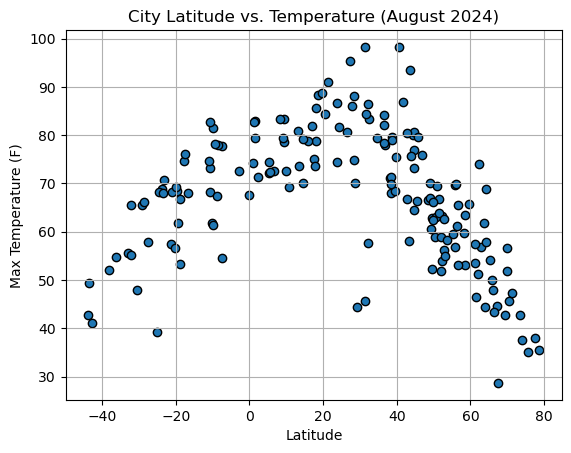

In [96]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black")

# Incorporate the other graph properties (title, labels, markers)
plt.title("City Latitude vs. Temperature (August 2024)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(visible=True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

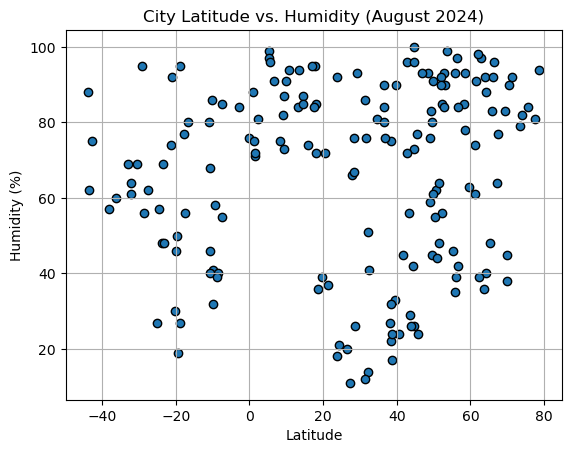

In [97]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (August 2024)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(visible=True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

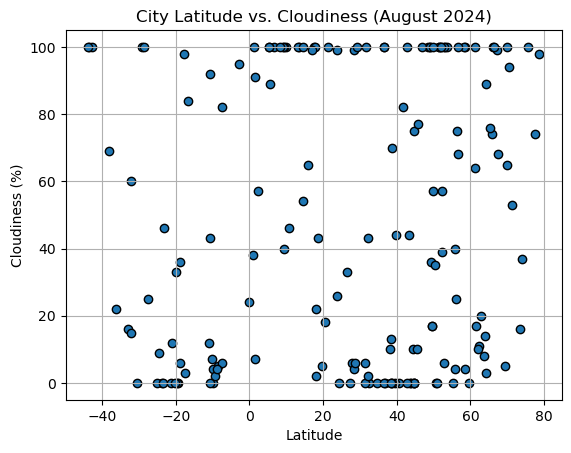

In [98]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (August 2024)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(visible=True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

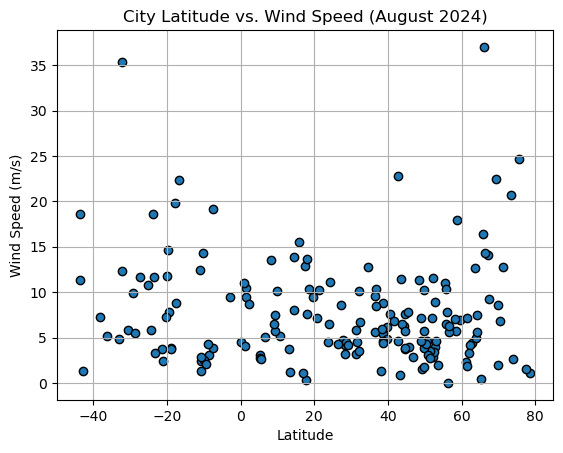

In [99]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (August 2024)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(visible=True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [100]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0.0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,stanovoye,52.8557,38.3991,56.14,93,6,3.96,RU,1722818235
1,bridgewater,42.6595,-64.7467,66.81,96,100,22.82,CA,1722818240
2,edinburgh of the seven seas,52.3188,-60.5296,63.27,56,39,2.86,CA,1722818245
3,tongren,27.3877,-5.9324,95.45,11,0,8.63,DZ,1722818255
4,longyearbyen,17.9553,-91.3155,78.75,85,2,7.54,MX,1722818256


In [101]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0.0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
7,levuka,-27.4495,135.0061,57.85,62,25,11.72,AU,1722818265
8,avarua,-30.5979,128.0477,47.88,69,0,5.88,AU,1722818269
9,tanout,-17.7119,179.1276,74.71,77,98,19.80,FJ,1722818272
13,hithadhoo,-23.7641,146.6746,68.79,48,0,18.59,AU,1722818281
18,makushino,-29.1076,-48.1584,65.44,95,100,9.95,BR,1722818313


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.49822037590343876


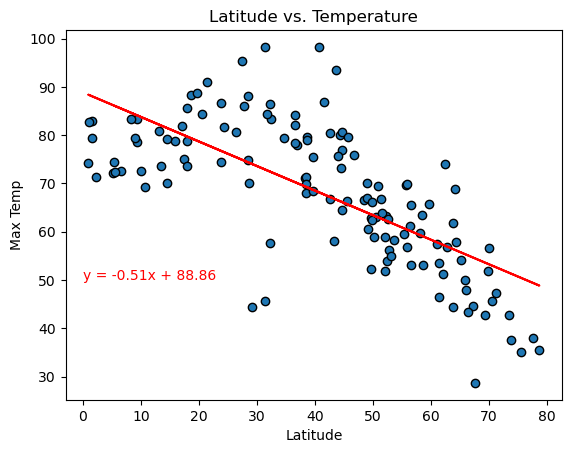

In [102]:
# Linear regression on Northern Hemisphere
pSlope, pInt, pR, p_p, pStdErr = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
linPlot = pSlope * northern_hemi_df["Lat"] + pInt
line_eq = "y = " + str(round(pSlope,2)) + "x + " + str(round(pInt,2))

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], edgecolor="black")
plt.plot(northern_hemi_df["Lat"], linPlot, color="red")

plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq, (0,50), color="red")

print(f"The r^2-value is: {pR**2}")

plt.show()

The r^2-value is: 0.46331788744620217


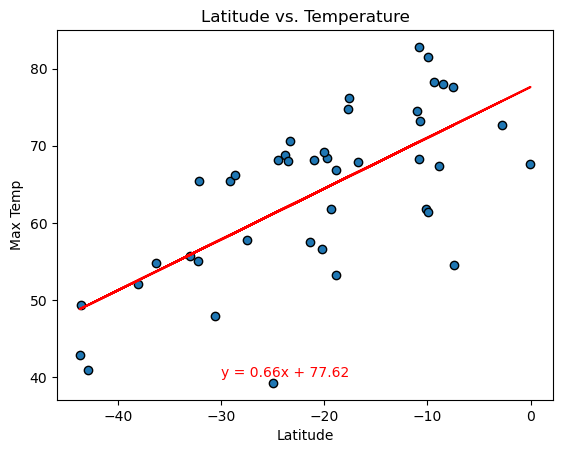

In [103]:
# Linear regression on Southern Hemisphere
pSlope, pInt, pR, p_p, pStdErr = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
linPlot = pSlope * southern_hemi_df["Lat"] + pInt
line_eq = "y = " + str(round(pSlope,2)) + "x + " + str(round(pInt,2))

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], edgecolor="black")
plt.plot(southern_hemi_df["Lat"], linPlot, color="red")

plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq, (-30,40), color="red")

print(f"The r^2-value is: {pR**2}")

plt.show()

**Discussion about the linear relationship:** Both linear regressions point towards a similar conclusion - higher max temperatures are more common closer to latitude 0, or the equator, and temperatures tend to be lower the farther a location is from that point.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 5.500932574166805e-05


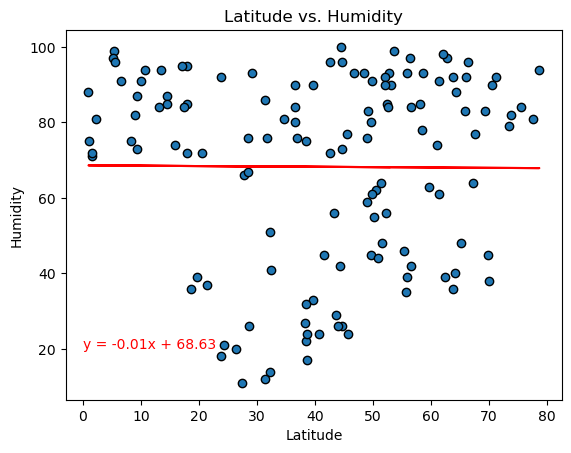

In [104]:
# Northern Hemisphere
pSlope, pInt, pR, p_p, pStdErr = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
linPlot = pSlope * northern_hemi_df["Lat"] + pInt
line_eq = "y = " + str(round(pSlope,2)) + "x + " + str(round(pInt,2))

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], edgecolor="black")
plt.plot(northern_hemi_df["Lat"], linPlot, color="red")

plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq, (0,20), color="red")

print(f"The r^2-value is: {pR**2}")

plt.show()

The r^2-value is: 0.014079073750558101


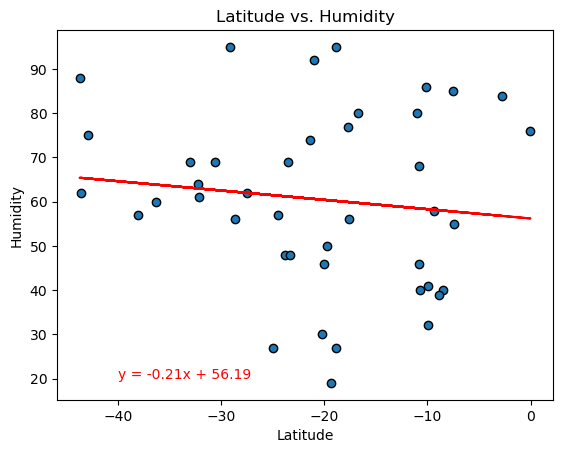

In [105]:
# southern Hemisphere
pSlope, pInt, pR, p_p, pStdErr = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
linPlot = pSlope * southern_hemi_df["Lat"] + pInt
line_eq = "y = " + str(round(pSlope,2)) + "x + " + str(round(pInt,2))

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], edgecolor="black")
plt.plot(southern_hemi_df["Lat"], linPlot, color="red")

plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq, (-40,20), color="red")

print(f"The r^2-value is: {pR**2}")

plt.show()

**Discussion about the linear relationship:** The correlation between an area's latitude and humidity seems to me very minimal, but the humidity does seem to have a very weak trend of decreasing through an increase in latitude. 

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.003912557639415237


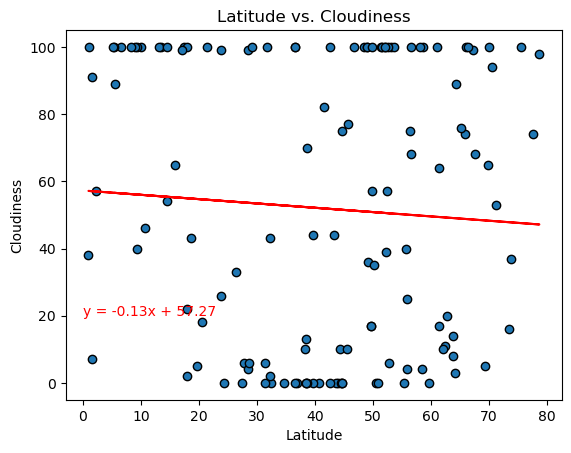

In [106]:
# Northern Hemisphere
pSlope, pInt, pR, p_p, pStdErr = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
linPlot = pSlope * northern_hemi_df["Lat"] + pInt
line_eq = "y = " + str(round(pSlope,2)) + "x + " + str(round(pInt,2))

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], edgecolor="black")
plt.plot(northern_hemi_df["Lat"], linPlot, color="red")

plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq, (0,20), color="red")

print(f"The r^2-value is: {pR**2}")

plt.show()

The r^2-value is: 0.10194318124654407


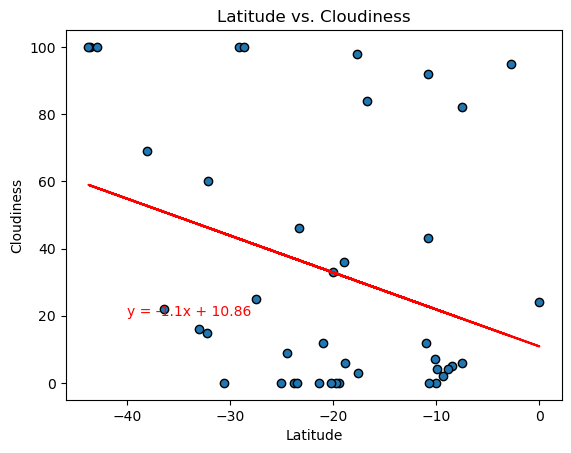

In [107]:
# Southern Hemisphere
pSlope, pInt, pR, p_p, pStdErr = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
linPlot = pSlope * southern_hemi_df["Lat"] + pInt
line_eq = "y = " + str(round(pSlope,2)) + "x + " + str(round(pInt,2))

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], edgecolor="black")
plt.plot(southern_hemi_df["Lat"], linPlot, color="red")

plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq, (-40,20), color="red")

print(f"The r^2-value is: {pR**2}")

plt.show()

**Discussion about the linear relationship:** A similar trend seems to be in place here as with the latitude vs. cloudiness relationship; as the latitude increases, the cloudiness of the weather trends towards clearer skies very fractionally. Here, the southern hemisphere seems to have a much sharper trend towards less clouds, due to the large group of low-cloudiness data points around latitude -20.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.010158617894652448


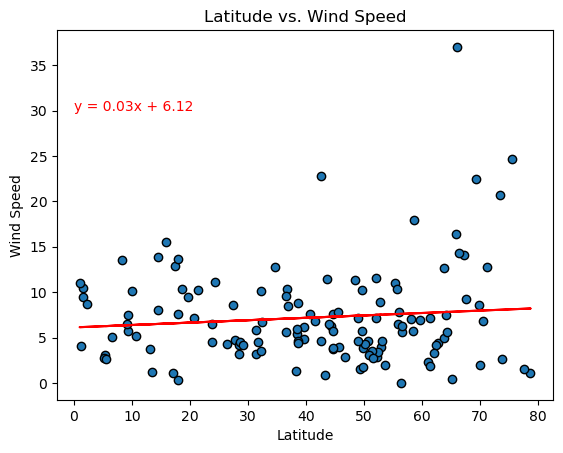

In [108]:
# Northern Hemisphere
pSlope, pInt, pR, p_p, pStdErr = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
linPlot = pSlope * northern_hemi_df["Lat"] + pInt
line_eq = "y = " + str(round(pSlope,2)) + "x + " + str(round(pInt,2))

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], edgecolor="black")
plt.plot(northern_hemi_df["Lat"], linPlot, color="red")

plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq, (0,30), color="red")

print(f"The r^2-value is: {pR**2}")

plt.show()

The r^2-value is: 0.0450025665871012


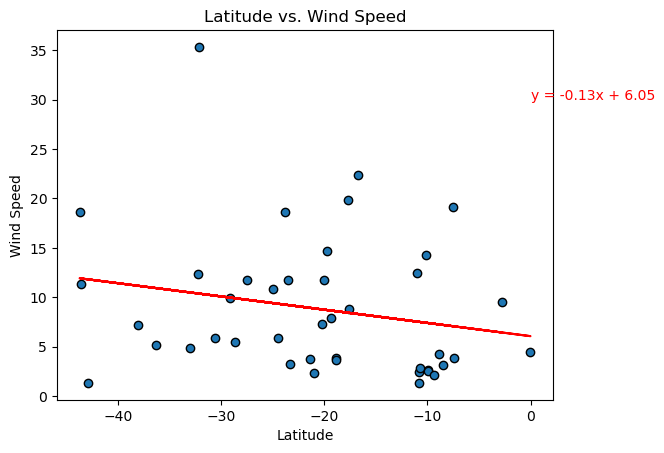

In [109]:
# Southern Hemisphere
pSlope, pInt, pR, p_p, pStdErr = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
linPlot = pSlope * southern_hemi_df["Lat"] + pInt
line_eq = "y = " + str(round(pSlope,2)) + "x + " + str(round(pInt,2))

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], edgecolor="black")
plt.plot(southern_hemi_df["Lat"], linPlot, color="red")

plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq, (0,30), color="red")

print(f"The r^2-value is: {pR**2}")

plt.show()

**Discussion about the linear relationship:** Wind speed in relation to latitude seems to have a similar, but not exact, relationship as the relation of temperature and latitude. Wind speed's overall trend is to start lower near the equator and increase as you move away, though with a much slower increase over distance.